# Methods to remove Outliers

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from pandas import read_csv


In [5]:
df = read_csv("C:/Users/Pratiksha/Desktop/outliers_removing/Pokemon (1).csv")

In [6]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [31]:
df.sort_values(['HP'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
388,355,Duskull,Ghost,NaN,295,20,40,90,30,90,25,3,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


{'whiskers': [<matplotlib.lines.Line2D at 0x20effcb56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20effcb5d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20effcb5370>],
 'medians': [<matplotlib.lines.Line2D at 0x20effcc2490>],
 'fliers': [<matplotlib.lines.Line2D at 0x20effcc27f0>],
 'means': []}

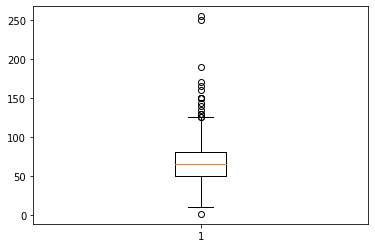

In [32]:
plt.boxplot(df['HP'])

In [34]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [35]:
q1 = df.HP.quantile(0.25)
q3 = df.HP.quantile(0.75)
q1,q3

(50.0, 80.0)

In [36]:
Iqr = q3 -q1

In [37]:
Iqr

30.0

In [38]:
lower_limit = q1 - 1.5*Iqr
upper_limit = q3 + 1.5*Iqr
lower_limit,upper_limit


(5.0, 125.0)

In [40]:
HP_Outliers = df[(df.HP<lower_limit)|(df.HP>upper_limit)]

HP_Outliers

In [41]:
HP_Outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
145,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False


In [45]:
no_outlier_data = df[(df.HP>lower_limit)&(df.HP<upper_limit)]

In [46]:
no_outlier_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [47]:
no_outlier_data.shape

(777, 13)